# PHP - Pulsating Heat Pipe [Al2O3, 60FR]

In [7]:
from analysis import PulseHeatPipe
from analysis import DataVisualisation

In [8]:
analysis = PulseHeatPipe("data/al2o3_diwater_exp/60_FR/")

Data loaded from directory: data/al2o3_diwater_exp/60_FR/


In [9]:
df, df_conv = analysis.data_etl()

Compiled and converted data is saved at: data/al2o3_diwater_exp/60_FR/'combined_converted_data.csv'


In [10]:
df_gfe = analysis.gibbs_fe(df_conv)

Gibbs Free Energy calculated data saved at: data/al2o3_diwater_exp/60_FR/'gfe_combined.csv


In [11]:
df_gfe

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,0.0,304.483333,301.15,3.333333,0.379969,0.041667,-2449.623484,-2422.806215,-26.817270
1,0.5,304.150000,301.15,3.000000,0.379969,0.037500,-2446.941758,-2422.806215,-24.135543
2,1.0,303.816667,301.15,2.666667,0.379969,0.033333,-2444.260031,-2422.806215,-21.453816
3,1.5,305.483333,301.90,3.583333,0.379969,0.044792,-2457.668665,-2428.840101,-28.828565
4,2.0,306.483333,302.15,4.333333,0.379969,0.054167,-2465.713846,-2430.851396,-34.862450
...,...,...,...,...,...,...,...,...,...
443,57.5,365.150000,338.90,17.583333,1.013250,0.219792,39.959662,37.087031,2.872631
444,58.0,365.550000,339.15,18.000000,1.013250,0.225000,40.003435,37.114389,2.889046
445,58.5,364.750000,340.15,16.333333,1.013250,0.204167,39.915888,37.223823,2.692065
446,59.0,364.350000,343.40,14.083333,1.013250,0.176042,39.872115,37.579482,2.292633


In [12]:
visual = DataVisualisation('Al2O3_DI_60FR')

Data loaded from directory: Al2O3_DI_60FR


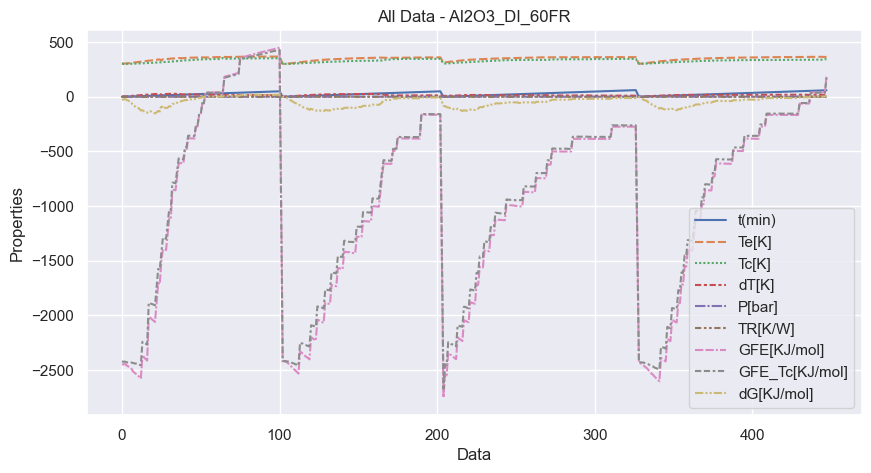

In [13]:
visual.plot_all_data(df_gfe)

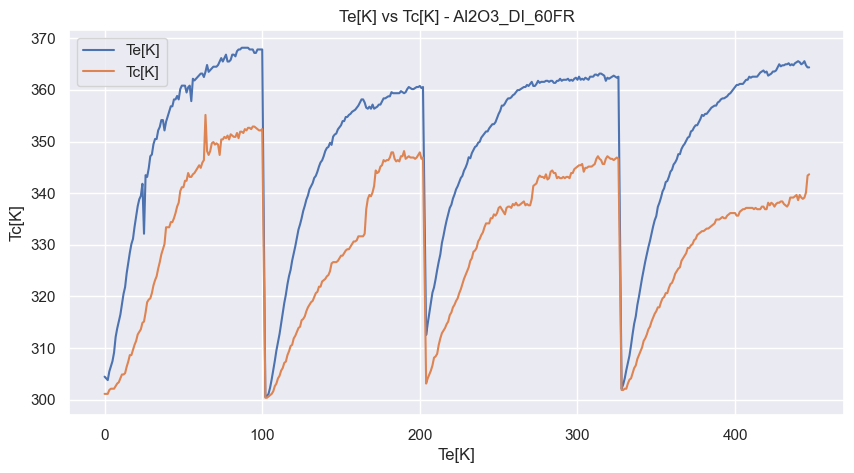

In [14]:
visual.plot_Te_Tc(df_gfe)

In [15]:
df_selected = analysis.data_chop(df_gfe)

Optimal range of temperature(Te) for data selection: [Tmin:300.55, Tmax:368]


In [16]:
df_mean, df_std = analysis.data_stat(df_selected)

Calculated mean and standard deviation values saved at data/al2o3_diwater_exp/60_FR/'combined_mean.csv' and 'combined_std.csv'


In [17]:
df_mean

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,300.550000,0.000000,300.400000,0.150000,0.379969,0.001875,-2417.979106,-2416.772329,-1.206777
1,300.750000,0.500000,300.400000,0.350000,0.379969,0.004375,-2419.588143,-2416.772329,-2.815813
2,301.150000,1.000000,300.650000,0.500000,0.379969,0.006250,-2422.806215,-2418.783625,-4.022590
3,302.150000,0.000000,301.900000,0.250000,0.379969,0.003125,-2430.851396,-2428.840101,-2.011295
4,302.350000,1.500000,300.900000,1.450000,0.379969,0.018125,-2432.460432,-2420.794920,-11.665512
...,...,...,...,...,...,...,...,...,...
218,366.816667,40.000000,350.900000,15.916667,1.131320,0.198958,376.278813,359.954841,16.323972
219,367.150000,47.750000,352.775000,14.375000,1.151985,0.179688,431.884437,414.974292,16.910145
220,367.483333,42.000000,351.650000,15.833333,1.136653,0.197917,391.340825,374.479571,16.861254
221,367.816667,46.888889,352.177778,15.638889,1.149689,0.195486,426.513960,408.397183,18.116778


In [18]:
analysis.data_property_avg(df_mean, df_std)

Tc  average:     324.7877 +- 2.0934 [K]
P   average:     0.6561 +- 0.0304 [bar]
dT  average:     15.7971 +- 2.5043 [K]
TR  average:     0.1975 +- 0.0313 [K/W]
GFE average:     -1323.5673 +- 118.0243 [KJ/mol]



In [19]:
analysis.best_TP(df_mean)

Optimal G(T,P) condition at lowest (optimal) dG[-151.5555]
Te optimal:        337.4833[K] 
P  optimal:        0.48[bar] 
dT optimal:        24.8333[K] 
TR optimal:        0.3104[K/W] 
GFE optimal:       dG(337.4833, 0.48) = -2059.6294 [KJ/mol]



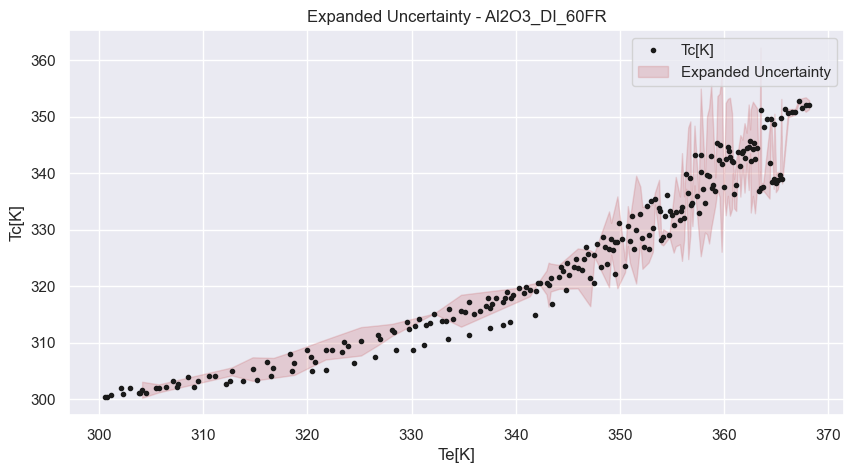

In [20]:
visual.plot_eu(df_mean, df_std, 'Tc[K]')

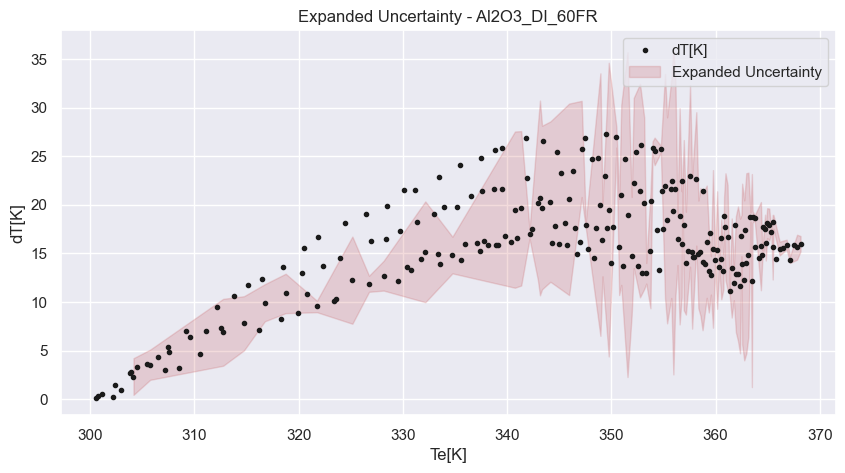

In [21]:
visual.plot_eu(df_mean, df_std, 'dT[K]')

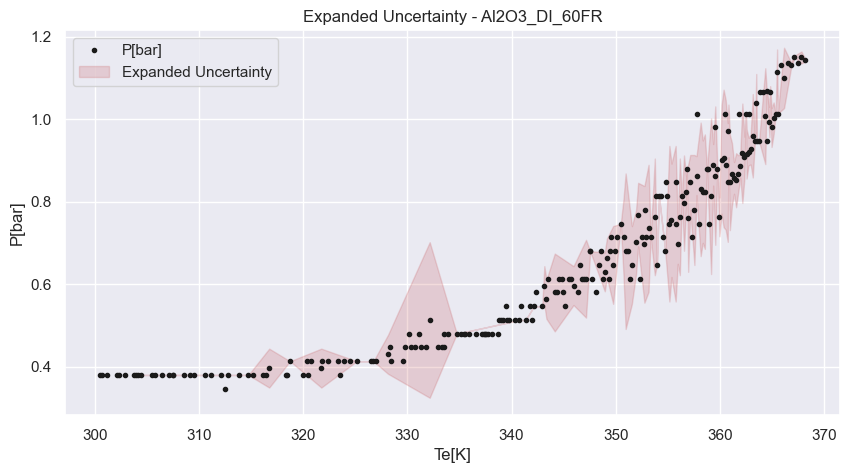

In [22]:
visual.plot_eu(df_mean, df_std, 'P[bar]')

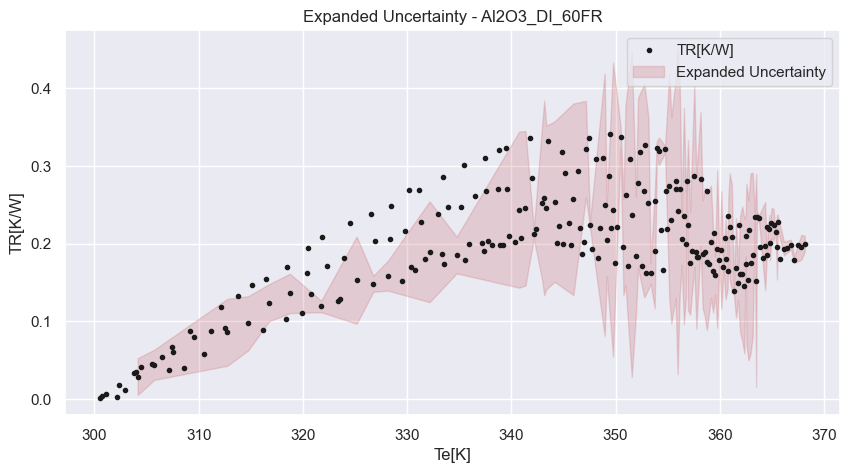

In [23]:
visual.plot_eu(df_mean, df_std, 'TR[K/W]')

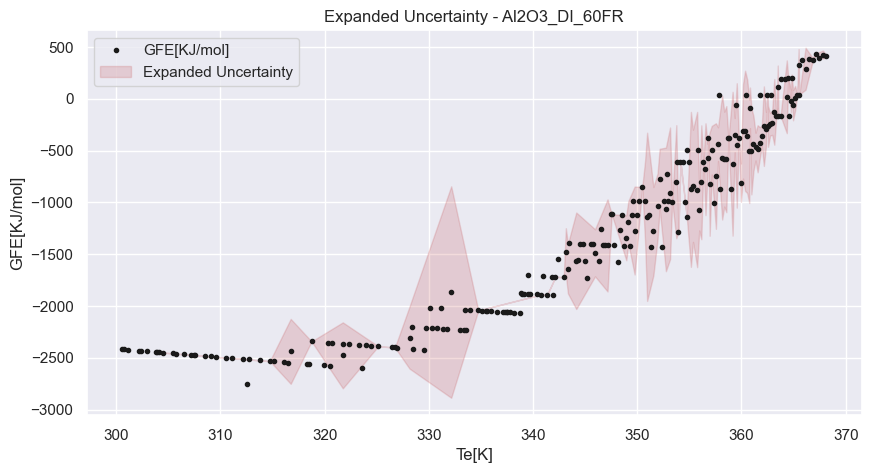

In [24]:
visual.plot_eu(df_mean, df_std, 'GFE[KJ/mol]')

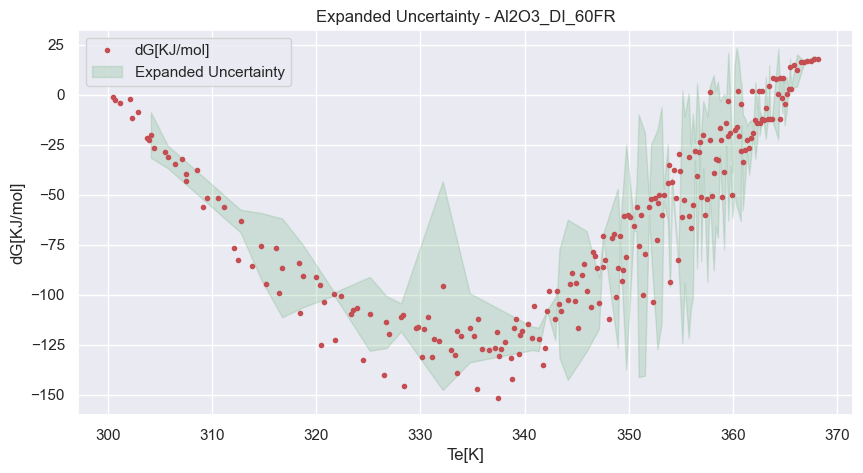

In [25]:
visual.plot_eu(df_mean, df_std, 'dG[KJ/mol]','.r','g')